# Forges statistics

This notebook creates figures that help to visualise the dynamics of softare development among different existing forges. Moreover it shows the proportion of links containing "http(s)" among all the links.


### Import libraries

In [26]:
import json

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import sys
from tqdm import tqdm

%reload_ext autoreload
%autoreload 2
sys.path.append('../scripts')
import pbmd_tools as tools

### Download data

In [6]:
df_github = pd.read_csv("../results/tmp/github.tsv", sep='\t')
df_gitlab = pd.read_csv("../results/tmp/gitlab.tsv", sep='\t')
df_sourceforge = pd.read_csv("../results/tmp/sourceforge.tsv", sep='\t')
df_googlecode = pd.read_csv("../results/tmp/googlecode.tsv", sep='\t')
df_bitbucket = pd.read_csv("../results/tmp/bitbucket.tsv", sep='\t')
df_http = pd.read_csv("../results/tmp/http.tsv", sep='\t')

In [7]:
counts_github = df_github.groupby(df_github['year']).size().reset_index(name='count')
counts_gitlab = df_gitlab.groupby(df_gitlab['year']).size().reset_index(name='count')
counts_sourceforge = df_sourceforge.groupby(df_sourceforge['year']).size().reset_index(name='count')
counts_googlecode = df_googlecode.groupby(df_googlecode['year']).size().reset_index(name='count')
counts_bitbucket = df_bitbucket.groupby(df_bitbucket['year']).size().reset_index(name='count')
counts_http = df_http.groupby(df_http['year']).size().reset_index(name='count')

In [9]:
years = list(range(2009, 2023))

In [10]:
stats_github = tools.fill_empty_years(years, counts_github).set_index('year')['count'].to_dict()
stats_gitlab = tools.fill_empty_years(years, counts_gitlab).set_index('year')['count'].to_dict()
stats_sourceforge = tools.fill_empty_years(years, counts_sourceforge).set_index('year')['count'].to_dict()
stats_googlecode = tools.fill_empty_years(years, counts_googlecode).set_index('year')['count'].to_dict()
stats_bitbucket = tools.fill_empty_years(years, counts_bitbucket).set_index('year')['count'].to_dict()

### Plot the statistics of forge usage (Fig. 1)

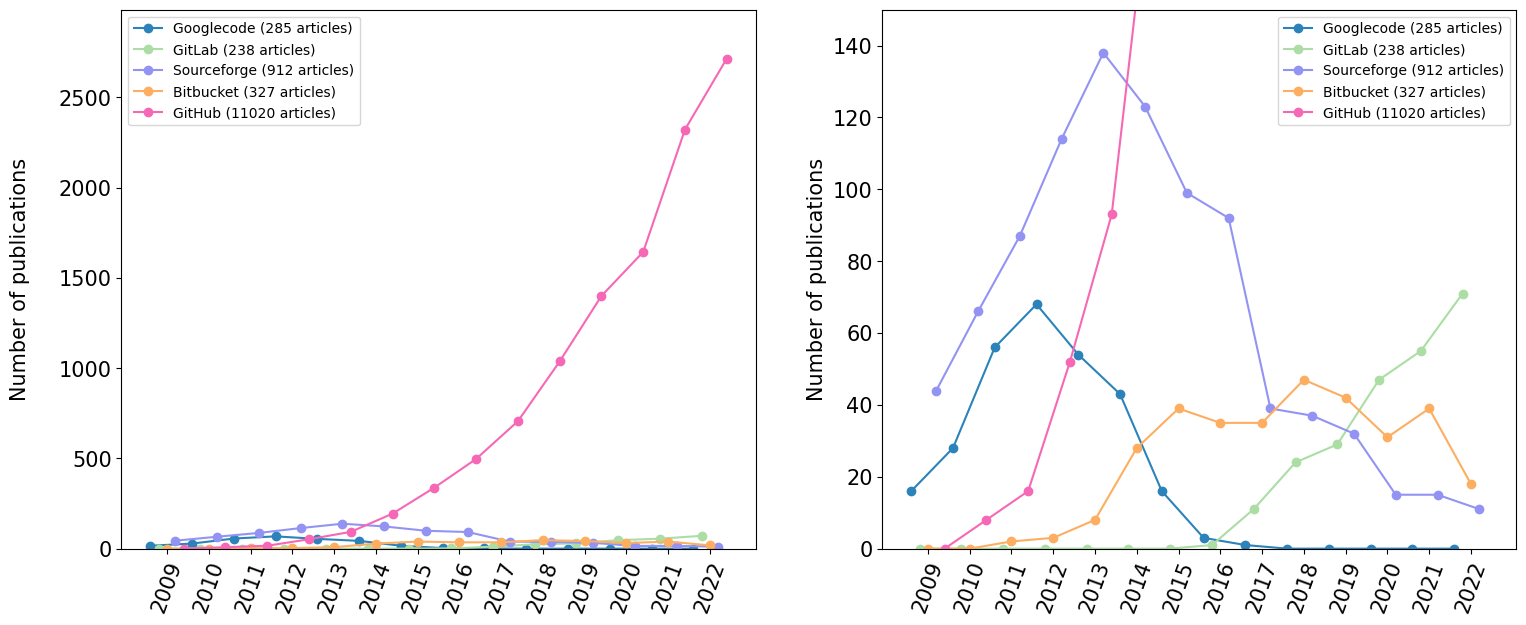

In [11]:
fig, ax = plt.subplots(1,2, figsize=(18, 7))
    
values_github = list(stats_github.values())
values_gitlab = list(stats_gitlab.values())
values_sourceforge = list(stats_sourceforge.values())
values_googlecode = list(stats_googlecode.values())
values_bitbucket = list(stats_bitbucket.values())

bar_width = 0.2
x_pos = np.arange(len(years)) 

ax[0].plot(x_pos - bar_width*2, values_googlecode,  marker='o', color='#2b83ba',  zorder=2)
ax[0].plot(x_pos - bar_width, values_gitlab,  marker='o', color='#abdda4',  zorder=2)
ax[0].plot(x_pos + bar_width, values_sourceforge,  marker='o', color='#9393f4', zorder=2)
ax[0].plot(x_pos, values_bitbucket,  marker='o', color='#fdae61', zorder=2)
ax[0].plot(x_pos + bar_width*2, values_github,  marker='o', color='#f668b5', zorder=2)

#ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of publications\n', fontsize=15)
#ax[0].set_title('Publications per year')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(years, rotation=70, fontsize=15)

ax[0].set_ylim(0, max(values_github)*1.1)

ax[0].legend([f'Googlecode ({sum(values_googlecode)} articles)', 
              f'GitLab ({sum(values_gitlab)} articles)', 
              f'Sourceforge ({sum(values_sourceforge)} articles)', 
              f'Bitbucket ({sum(values_bitbucket)} articles)', 
              f'GitHub ({sum(values_github)-2} articles)'])

#for i in range(len(years)):
#    ax[0].text(i+bar_width*3/2+0.33, values_github[i]-5, str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#f668b5')

ax[0].tick_params(axis='y', labelsize=15)

ax[1].plot(x_pos - bar_width*2, values_googlecode,  marker='o', color='#2b83ba',  zorder=2)
ax[1].plot(x_pos - bar_width, values_gitlab,  marker='o', color='#abdda4',  zorder=2)
ax[1].plot(x_pos + bar_width, values_sourceforge,  marker='o', color='#9393f4', zorder=2)
ax[1].plot(x_pos, values_bitbucket,  marker='o', color='#fdae61', zorder=2)
ax[1].plot(x_pos + bar_width*2, values_github,  marker='o', color='#f668b5', zorder=2)


#ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of publications', fontsize=15)
#ax[1].set_title('Publications per year')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(years, rotation=70, fontsize=15)

ax[1].legend([f'Googlecode ({sum(values_googlecode)} articles)', 
              f'GitLab ({sum(values_gitlab)} articles)', 
              f'Sourceforge ({sum(values_sourceforge)} articles)', 
              f'Bitbucket ({sum(values_bitbucket)} articles)', 
              f'GitHub ({sum(values_github)-2} articles)'])

# adding numbers for each point (if needed)

#for i in range(len(years)):
#    if values_github[i] <  110:
#        ax[1,1].text(i+bar_width*3/2+0.33, values_github[i]+0.5, str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#253494')
#    ax[1,1].text(i-bar_width*3/2-0.0001, values_googlecode[i]+1, str(values_googlecode[i]), ha='center', va='bottom', fontsize=9, color='#a1dab4')
#    ax[1,1].text(i-bar_width/2-0.0001, values_gitlab[i]+1, str(values_gitlab[i]), ha='center', va='bottom', fontsize=9, color='#41b6c4')
#    ax[1,1].text(i+bar_width/2-0.0001, values_sourceforge[i]+1, str(values_sourceforge[i]), ha='center', va='bottom', fontsize=9, color='#2c7fb8')


ax[1].set_ylim(0, 150)
    
ax[1].tick_params(axis='y', labelsize=15)  

plt.savefig("../results/images/stat_forges.png")
plt.show()

### Plot the statistics of http(s) VS no http(s) in links (Fig. 2)

In [12]:
with open("../results/tmp/links_http_stat.json", "r") as f:
    links_http_stat = json.load(f)

In [13]:
forges_http = {'github.com': links_http_stat['github.com'],
              'sourceforge.net': links_http_stat['sourceforge.net'],
              'code.google.com': links_http_stat['code.google.com'],
              'bitbucket.org': links_http_stat['bitbucket.org'],
              'gitlab.com': links_http_stat['gitlab.com']}

In [14]:
forges_no_http = {'github.com': sum(stats_github.values()),
                  'sourceforge.net': sum(stats_sourceforge.values()),
                  'code.google.com': sum(stats_googlecode.values()),
                  'bitbucket.org': sum(stats_bitbucket.values()),
                  'gitlab.com': sum(stats_gitlab.values())}

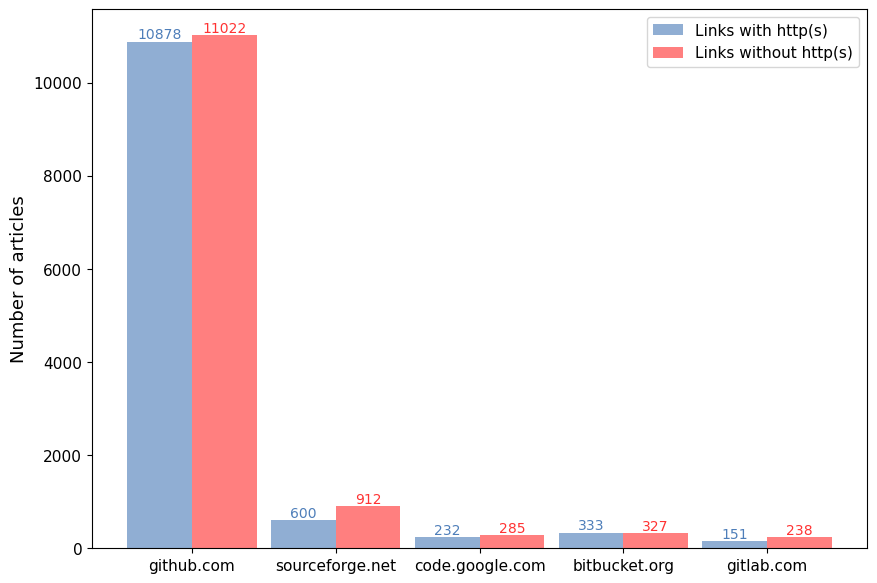

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

forges = list(forges_http.keys())
values_http = list(forges_http.values())
values_no_http = list(forges_no_http.values())

bar_width = 0.45
x_pos = np.arange(len(forges)) 

ax.bar(x_pos - bar_width/2, values_http, color='#225ea8', alpha = 0.5, width=bar_width)
ax.bar(x_pos + bar_width/2, values_no_http, color='red', alpha = 0.5, width=bar_width)


#ax.set_xlabel('Forge', fontsize=13, fontfamily='sans-serif')
ax.set_ylabel('Number of articles', fontsize=13, fontfamily='sans-serif')
#ax.set_title('Publications per year', fontsize=15, fontfamily='sans-serif')

# adding numbers for each point 
for i in range(len(forges)):
    ax.text(i-bar_width/2, values_http[i], str(values_http[i]), 
            ha='center', va='bottom', fontsize=10, color='#225ea8', alpha = 0.8)
    ax.text(i+bar_width/2, values_no_http[i], str(values_no_http[i]), 
            ha='center', va='bottom', fontsize=10, color='red', alpha = 0.8)


ax.legend([f"Links with http(s)", 
           f"Links without http(s)"], fontsize=11)

ax.set_xticks(x_pos)
ax.set_xticklabels(forges, fontsize=11, rotation=0)
ax.tick_params(axis='y', labelsize=11) 
ax.tick_params(axis='x', labelsize=11) 

plt.savefig("../results/images/stat_http.png")
plt.show()